In [1]:
import numpy as np
import os


In [2]:
import tensorflow as tf
devices = tf.config.experimental.list_physical_devices()
print(devices)
tf.config.experimental.set_memory_growth(devices[1],True)

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


Rename Images
"""
I use to this dataset " https://www.kaggle.com/datasets/shaunthesheep/microsoft-catsvsdogs-dataset "
"""

In [3]:
import random
import glob
import shutil

In [4]:
""" os.chdir("Cats and Dogs Exercise/data")

if os.path.isdir("train/dog") is False :
    
    os.makedirs("train/dog")
    os.makedirs("train/cat")
    os.makedirs("valid/dog")
    os.makedirs("valid/cat")
    os.makedirs("test/dog")
    os.makedirs("test/cat")

    for c in random.sample(glob.glob("cat*"),1000):
        shutil.move(c,"train/cat")
    for c in random.sample(glob.glob("dog*"),1000):
        shutil.move(c,"train/dog")
    for c in random.sample(glob.glob("cat*"),200):
        shutil.move(c,"valid/cat")
    for c in random.sample(glob.glob("dog*"),200):
        shutil.move(c,"valid/dog")
    for c in random.sample(glob.glob("cat*"),100):
        shutil.move(c,"test/cat")
    for c in random.sample(glob.glob("dog*"),100):
        shutil.move(c,"test/dog")
    
os.chdir("../../") """

' os.chdir("Cats and Dogs Exercise/data")\n\nif os.path.isdir("train/dog") is False :\n    \n    os.makedirs("train/dog")\n    os.makedirs("train/cat")\n    os.makedirs("valid/dog")\n    os.makedirs("valid/cat")\n    os.makedirs("test/dog")\n    os.makedirs("test/cat")\n\n    for c in random.sample(glob.glob("cat*"),1000):\n        shutil.move(c,"train/cat")\n    for c in random.sample(glob.glob("dog*"),1000):\n        shutil.move(c,"train/dog")\n    for c in random.sample(glob.glob("cat*"),200):\n        shutil.move(c,"valid/cat")\n    for c in random.sample(glob.glob("dog*"),200):\n        shutil.move(c,"valid/dog")\n    for c in random.sample(glob.glob("cat*"),100):\n        shutil.move(c,"test/cat")\n    for c in random.sample(glob.glob("dog*"),100):\n        shutil.move(c,"test/dog")\n    \nos.chdir("../../") '

In [5]:
train_path ="data\\train"
test_path ="data\\test"
valid_path ="data\\valid"

In [6]:
from keras.preprocessing.image import ImageDataGenerator

train_batchs = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=train_path,target_size=(224,224),classes=["cat","dog"],batch_size=20,shuffle=True)
test_batchs = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=test_path,target_size=(224,224),classes=["cat","dog"],batch_size=20,shuffle=False)
valid_batchs = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=valid_path,target_size=(224,224),classes=["cat","dog"],batch_size=20)

Found 2000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [7]:
assert train_batchs.n == 2000
assert valid_batchs.n == 400
assert test_batchs.n == 200
assert train_batchs.num_classes == valid_batchs.num_classes == test_batchs.num_classes == 2

In [8]:
imgs,labels = next(train_batchs)
imgs,labels

(array([[[[ -77.939     ,  -92.779     ,  -99.68      ],
          [ -80.939     ,  -95.779     , -102.68      ],
          [ -78.939     ,  -93.779     , -100.68      ],
          ...,
          [ -39.939003  ,  -73.779     ,   42.32      ],
          [ -38.939003  ,  -72.779     ,   42.32      ],
          [ -37.939003  ,  -71.779     ,   43.32      ]],
 
         [[ -77.939     ,  -92.779     ,  -99.68      ],
          [ -76.939     ,  -91.779     ,  -98.68      ],
          [ -81.939     ,  -96.779     , -103.68      ],
          ...,
          [ -39.939003  ,  -73.779     ,   42.32      ],
          [ -38.939003  ,  -72.779     ,   43.32      ],
          [ -37.939003  ,  -71.779     ,   43.32      ]],
 
         [[ -73.939     ,  -88.779     ,  -95.68      ],
          [ -70.939     ,  -85.779     ,  -92.68      ],
          [ -82.939     ,  -97.779     , -104.68      ],
          ...,
          [ -39.939003  ,  -73.779     ,   42.32      ],
          [ -38.939003  ,  -72.779   

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

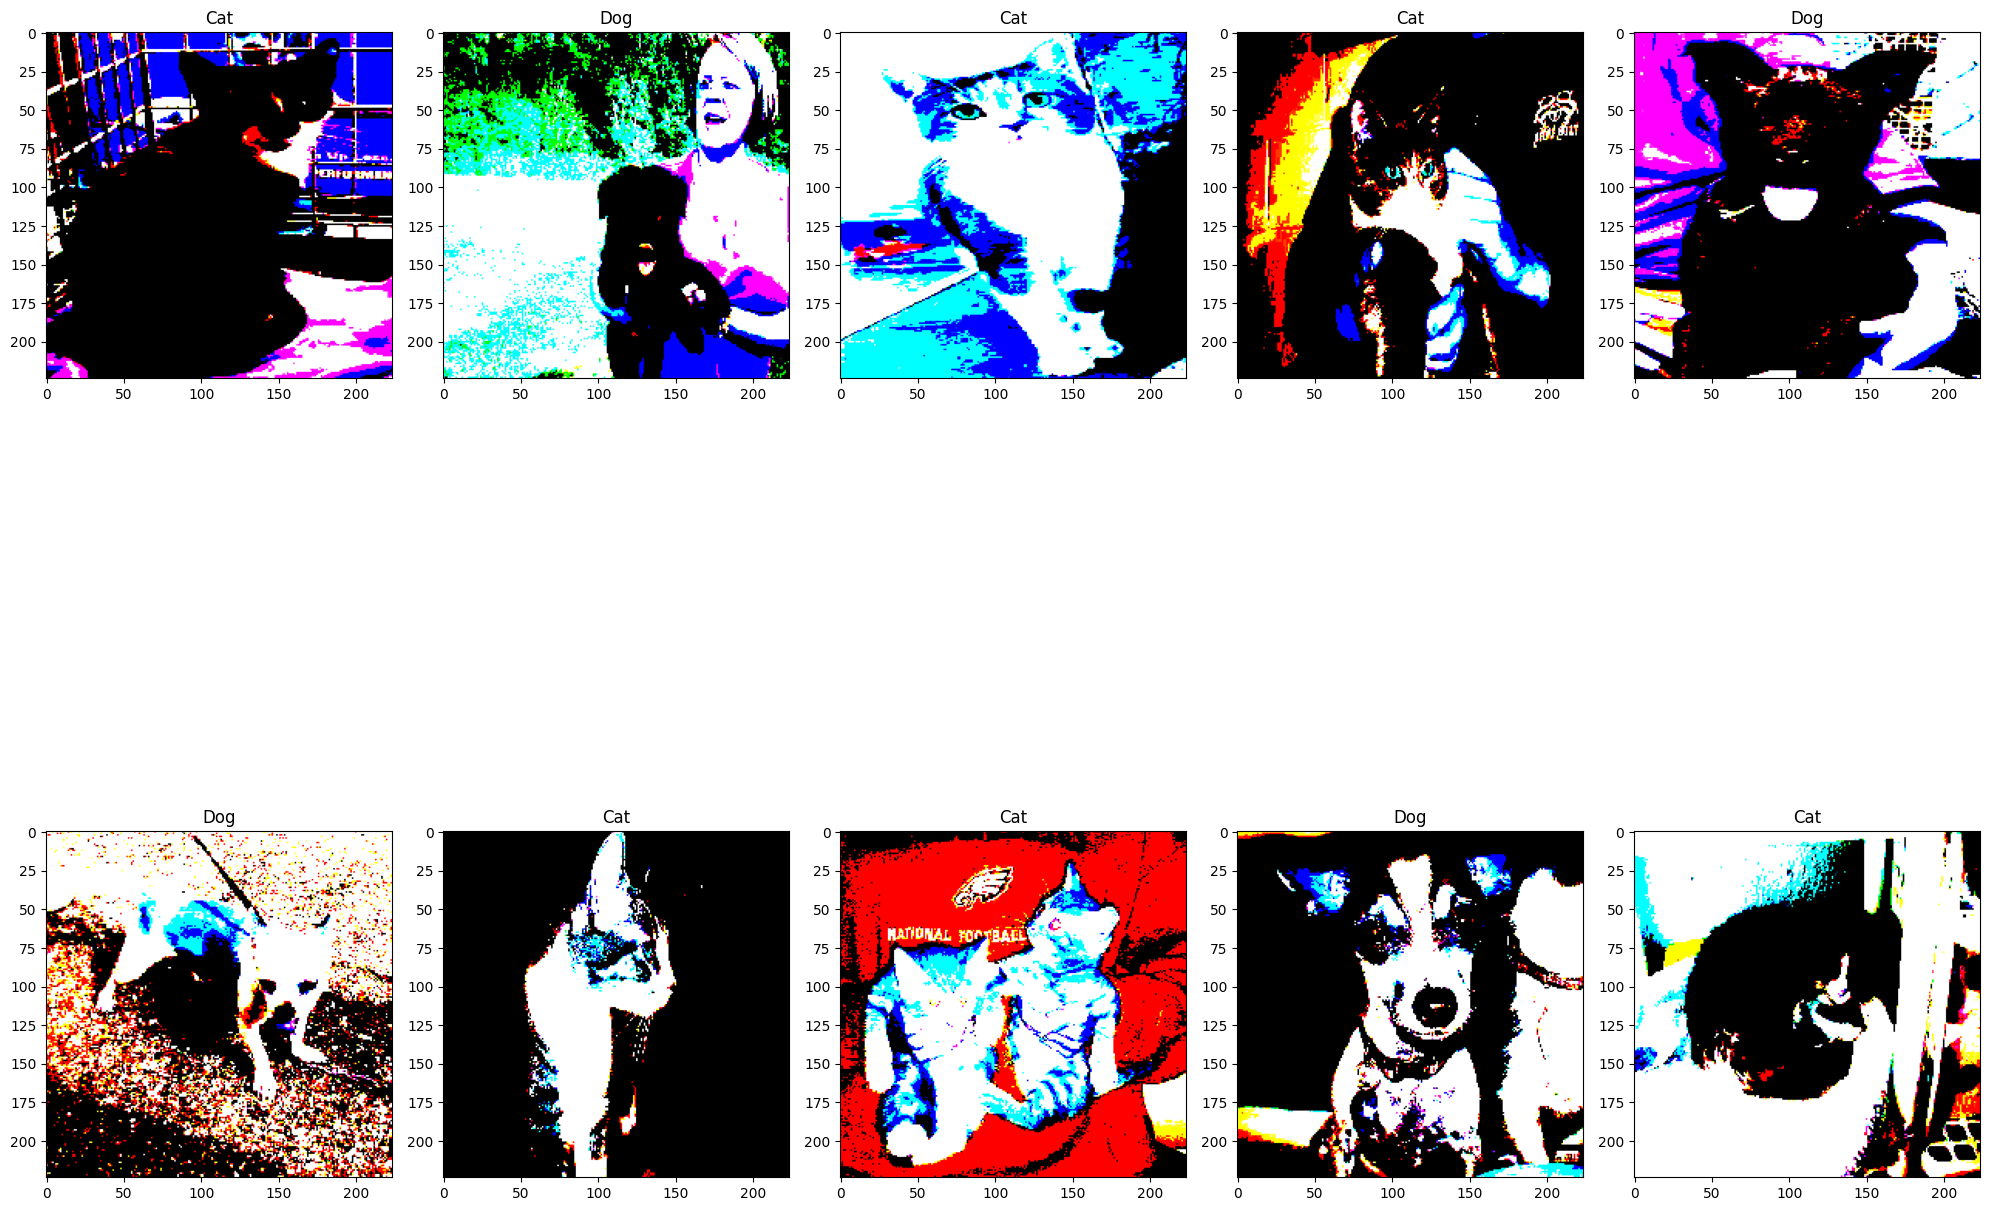

In [9]:
from matplotlib import pyplot as plt
def plotImages(images,labels):
    fig,axes = plt.subplots(2,5,figsize=(20,20))
    
    axes = axes.flatten()
    
    for image,label,axe in zip(images,labels,axes):
       
        axe.imshow(image)
        axe.set_title("Cat" if label[0]== 1 else "Dog")

    plt.tight_layout()
    plt.show()
    
    
plotImages(imgs,labels)

Create Model

In [10]:
from keras.layers import Dense,MaxPool2D,Conv2D,Flatten,Dropout,Activation
from keras.models import Sequential
from keras.optimizers import Adam
from keras.activations import relu

In [11]:
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=32,kernel_size=(3,3),padding="same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=2))

model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=2))
model.add(MaxPool2D(pool_size=(2,2),strides=2))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding="same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=2))
model.add(MaxPool2D(pool_size=(2,2),strides=2))

model.add(Flatten())
model.add(Activation(relu))
#model.add(Dense(units=16,activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(units=2,activation="softmax"))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 64)       0         
 2D)                                                             
                                                        

In [13]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=["accuracy"])

In [14]:
model.fit(x=train_batchs,validation_data=valid_batchs,epochs=20,verbose=1)

Epoch 1/20
100/100 [==============================] - 40s 224ms/step - loss: 5.7030 - accuracy: 0.5320 - val_loss: 1.7346 - val_accuracy: 0.6250
Epoch 2/20
100/100 [==============================] - 18s 177ms/step - loss: 2.3062 - accuracy: 0.6050 - val_loss: 1.1140 - val_accuracy: 0.6375
Epoch 3/20
100/100 [==============================] - 17s 172ms/step - loss: 1.3049 - accuracy: 0.6495 - val_loss: 0.9159 - val_accuracy: 0.6425
Epoch 4/20
100/100 [==============================] - 19s 189ms/step - loss: 0.9196 - accuracy: 0.6700 - val_loss: 0.7874 - val_accuracy: 0.6650
Epoch 5/20
100/100 [==============================] - 20s 197ms/step - loss: 0.7218 - accuracy: 0.6940 - val_loss: 0.7436 - val_accuracy: 0.6575
Epoch 6/20
100/100 [==============================] - 22s 217ms/step - loss: 0.5873 - accuracy: 0.7350 - val_loss: 0.7207 - val_accuracy: 0.6600
Epoch 7/20
100/100 [==============================] - 19s 187ms/step - loss: 0.5180 - accuracy: 0.7525 - val_loss: 0.6955 - val_ac

In [15]:
output = model.predict(x=test_batchs,verbose=0)
output 

array([[9.67427909e-01, 3.25721167e-02],
       [9.44965720e-01, 5.50342798e-02],
       [7.95254469e-01, 2.04745501e-01],
       [8.79009306e-01, 1.20990716e-01],
       [7.07733482e-02, 9.29226577e-01],
       [9.61188674e-01, 3.88112627e-02],
       [3.57845098e-01, 6.42154872e-01],
       [9.79420722e-01, 2.05793269e-02],
       [8.33673656e-01, 1.66326314e-01],
       [5.96649706e-01, 4.03350294e-01],
       [9.19139564e-01, 8.08605030e-02],
       [9.66718614e-01, 3.32813635e-02],
       [3.90203953e-01, 6.09796047e-01],
       [7.59926260e-01, 2.40073711e-01],
       [1.71926676e-03, 9.98280764e-01],
       [5.96222520e-01, 4.03777450e-01],
       [5.05609691e-01, 4.94390339e-01],
       [7.98854649e-01, 2.01145336e-01],
       [6.72500193e-01, 3.27499807e-01],
       [7.32439280e-01, 2.67560750e-01],
       [9.44073021e-01, 5.59269637e-02],
       [9.75985825e-01, 2.40141433e-02],
       [5.62604606e-01, 4.37395364e-01],
       [5.18882334e-01, 4.81117696e-01],
       [9.156284

In [16]:
predict_labels = np.argmax(output,axis=1)

In [17]:
predict_labels

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0], dtype=int64)

In [18]:
true_labels = np.where(predict_labels == test_batchs.classes)

print((len(true_labels[0])/len(test_batchs.classes)))

0.75


In [19]:
imgs,labels = next(test_batchs)
print(imgs.shape)
print(predict_labels.shape)
print(labels.shape)

(20, 224, 224, 3)
(200,)
(20, 2)


In [20]:
def plotPredictedImages(images,labels):
    fig,axes = plt.subplots(2,5,figsize=(20,20))
    
    axes = axes.flatten()
    
    for image,label,axe in zip(images,labels,axes):
        
        axe.imshow(image)
        axe.set_title("Cat" if label== 0 else "Dog")

    plt.tight_layout()
    plt.show()
    
    


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

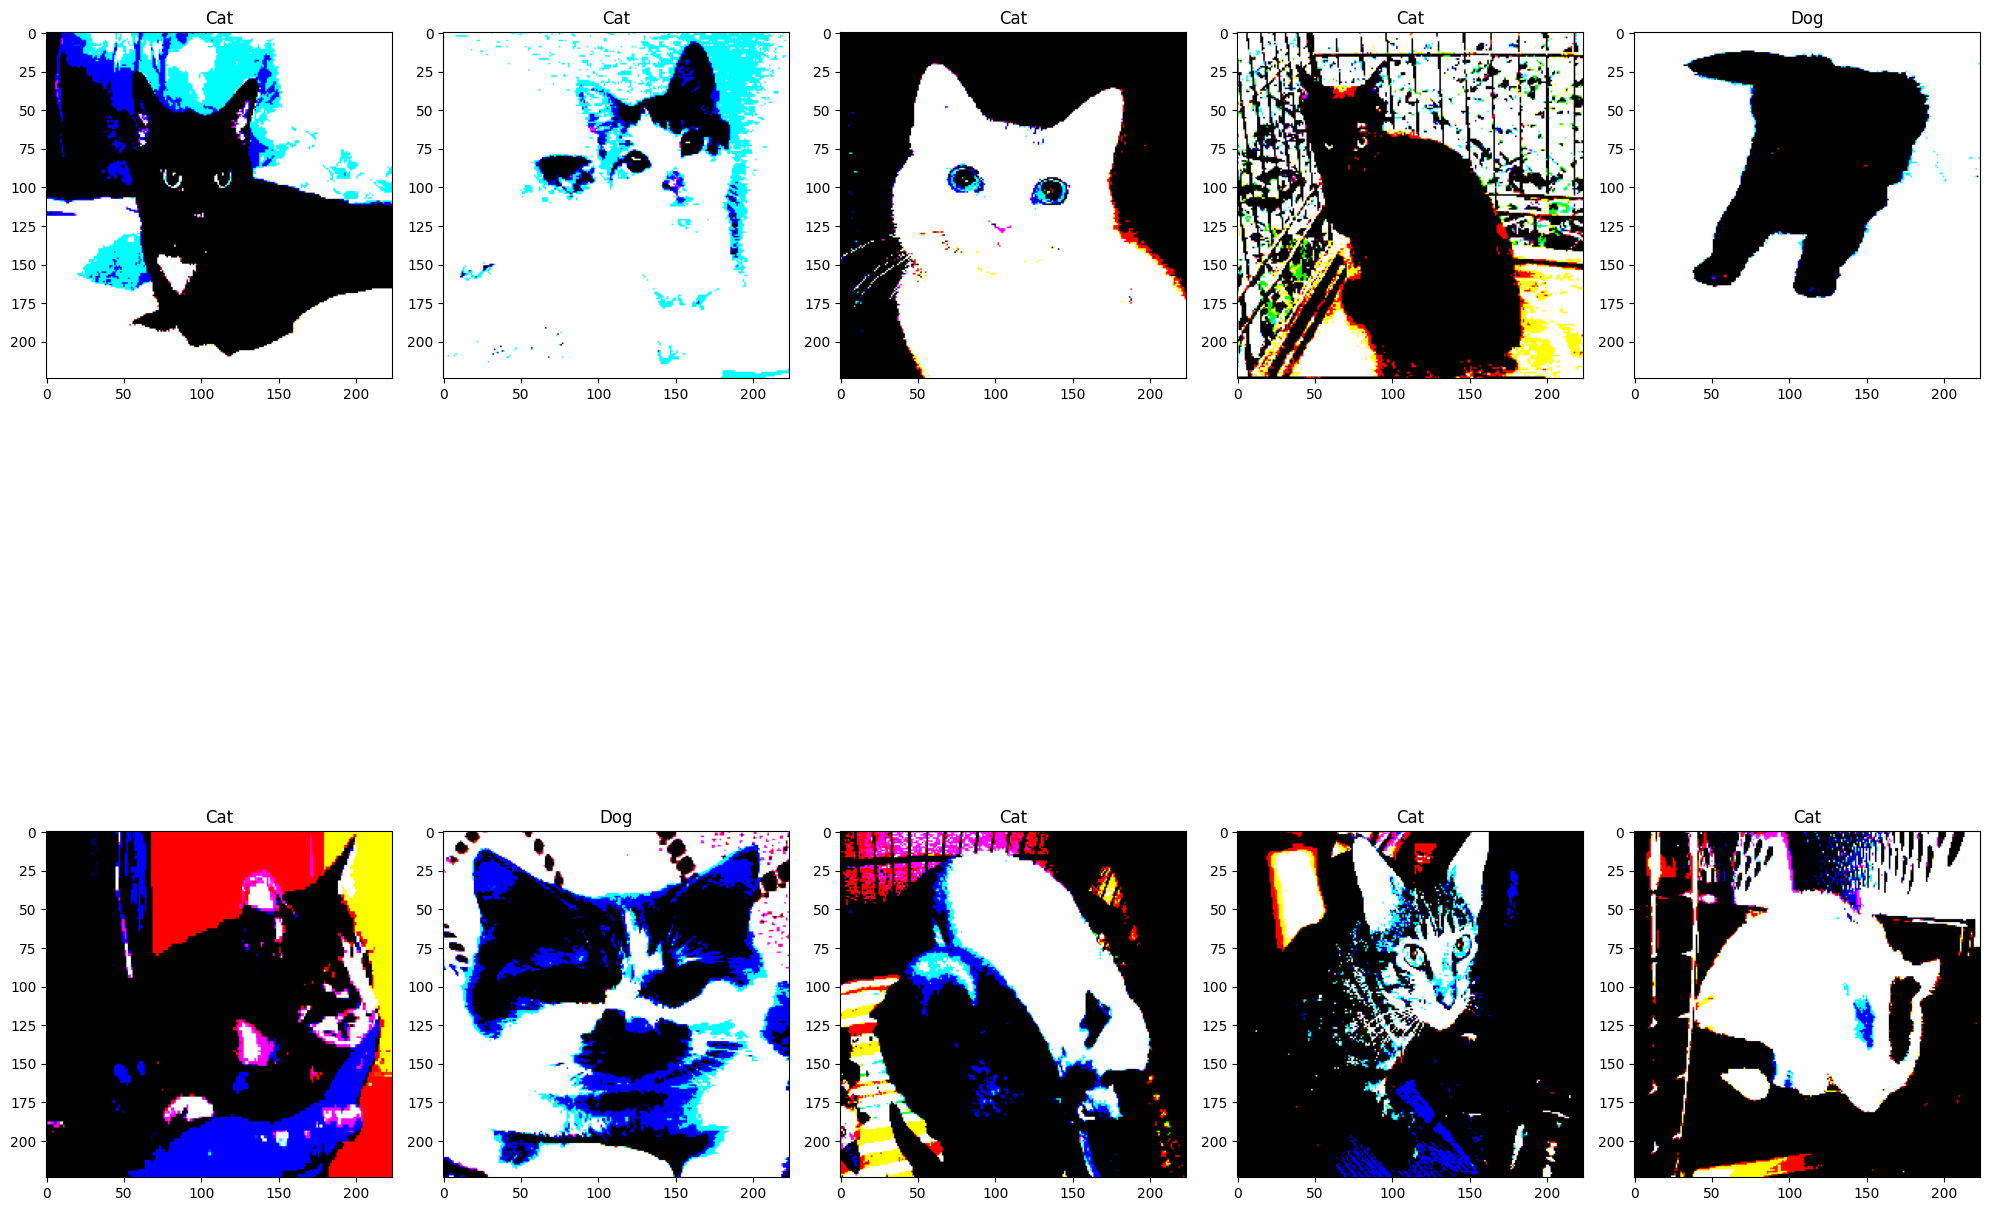

In [21]:
plotPredictedImages(imgs,predict_labels)

In [22]:
import os 

if os.path.isdir("model/myModel.h5") is False:
    model.save("model/myModel.h5")



INFO:tensorflow:Assets written to: ram://918793f1-8ea6-4a93-963c-bc78211c650c/assets


INFO:tensorflow:Assets written to: ram://918793f1-8ea6-4a93-963c-bc78211c650c/assets


In [23]:
## Confusion matrix

In [24]:
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

In [25]:
cm = confusion_matrix(test_batchs.classes,predict_labels)

In [26]:
def plot_confusion_matrix(cm,classes,normalize=False,title="Confusion matrix",cmap=plt.cm.Blues):

    plt.imshow(cm,interpolation="nearest",cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)

    if normalize:
        cm = cm.astype("float") / cm.sum(axis=1)[:,np.newaxis]

    print(cm)

    thresh = cm.max() / 2.
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],horizontalalignment="center",color="white" if cm[i,j]>thresh else "black")

    plt.tight_layout()
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")

In [27]:
test_batchs.class_indices

{'cat': 0, 'dog': 1}

[[79 21]
 [29 71]]


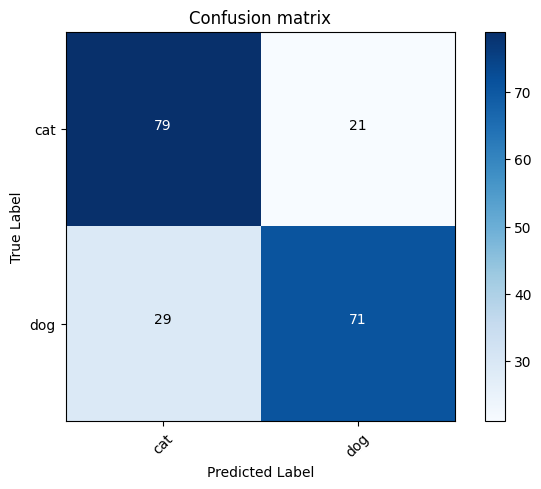

In [28]:
cm_plot_labels = ["cat","dog"]
plot_confusion_matrix(cm,cm_plot_labels)

In [29]:
del model

VGG16 Model

In [30]:
from keras.layers import Dense,MaxPool2D,Conv2D,Flatten,Dropout
from keras.models import Sequential
from keras.optimizers import Adam
from keras.applications.vgg16 import VGG16

In [31]:
vgg16 = VGG16()

In [32]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [33]:
vgg16_model =  Sequential()

for layer in vgg16.layers[:-1]:
    vgg16_model.add(layer)

for layer in vgg16_model.layers:
    layer.trainable = False

In [34]:
vgg16_model.add(Dense(units=2,activation="softmax"))

In [35]:
vgg16_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [36]:
vgg16_model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=["accuracy"])

VGG16 Model Train

In [37]:
train_path ="data\\train"
test_path ="data\\test"
valid_path ="data\\valid"

In [38]:
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

train_batchs = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=train_path,target_size=(224,224),classes=["cat","dog"],batch_size=20,shuffle=True)
test_batchs = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=test_path,target_size=(224,224),classes=["cat","dog"],batch_size=20,shuffle=False)
valid_batchs = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=valid_path,target_size=(224,224),classes=["cat","dog"],batch_size=20)

Found 2000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [39]:
vgg16_model.fit(x=train_batchs,validation_data=valid_batchs,epochs=5,verbose=1)

Epoch 1/5
100/100 [==============================] - 28s 246ms/step - loss: 0.3526 - accuracy: 0.8570 - val_loss: 0.1195 - val_accuracy: 0.9650
Epoch 2/5
100/100 [==============================] - 26s 257ms/step - loss: 0.1038 - accuracy: 0.9660 - val_loss: 0.0795 - val_accuracy: 0.9700
Epoch 3/5
100/100 [==============================] - 26s 254ms/step - loss: 0.0740 - accuracy: 0.9755 - val_loss: 0.0670 - val_accuracy: 0.9750
Epoch 4/5
100/100 [==============================] - 25s 247ms/step - loss: 0.0570 - accuracy: 0.9810 - val_loss: 0.0677 - val_accuracy: 0.9750
Epoch 5/5
100/100 [==============================] - 25s 245ms/step - loss: 0.0460 - accuracy: 0.9815 - val_loss: 0.0546 - val_accuracy: 0.9800


Predict VGG16 Model

In [40]:
output_vgg16 = vgg16_model.predict(x=test_batchs,verbose=0)
output_vgg16

array([[9.98685300e-01, 1.31475541e-03],
       [9.93628025e-01, 6.37199124e-03],
       [9.99950767e-01, 4.92795298e-05],
       [9.99997020e-01, 3.00916145e-06],
       [9.91070509e-01, 8.92948639e-03],
       [9.99980330e-01, 1.96682195e-05],
       [9.99998569e-01, 1.47890137e-06],
       [9.99912620e-01, 8.73389363e-05],
       [9.99908805e-01, 9.11927054e-05],
       [9.99986172e-01, 1.38039986e-05],
       [9.99995947e-01, 4.05975152e-06],
       [9.99337137e-01, 6.62898587e-04],
       [9.99029875e-01, 9.70152149e-04],
       [9.99921560e-01, 7.83843498e-05],
       [9.17348683e-01, 8.26512873e-02],
       [9.99858975e-01, 1.41051656e-04],
       [9.48203146e-01, 5.17968871e-02],
       [9.99942541e-01, 5.74046680e-05],
       [9.99195397e-01, 8.04560375e-04],
       [9.99440849e-01, 5.59189473e-04],
       [9.99857903e-01, 1.42112520e-04],
       [9.99995589e-01, 4.36458186e-06],
       [9.99942780e-01, 5.72180870e-05],
       [9.99861479e-01, 1.38453950e-04],
       [9.966717

In [41]:
predict_labels_vgg16 = np.argmax(output_vgg16,axis=1)
predict_labels_vgg16

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [42]:
true_labels_vgg16 = np.where(predict_labels_vgg16 == test_batchs.classes)

print((len(true_labels_vgg16[0])/len(test_batchs.classes)))

0.97


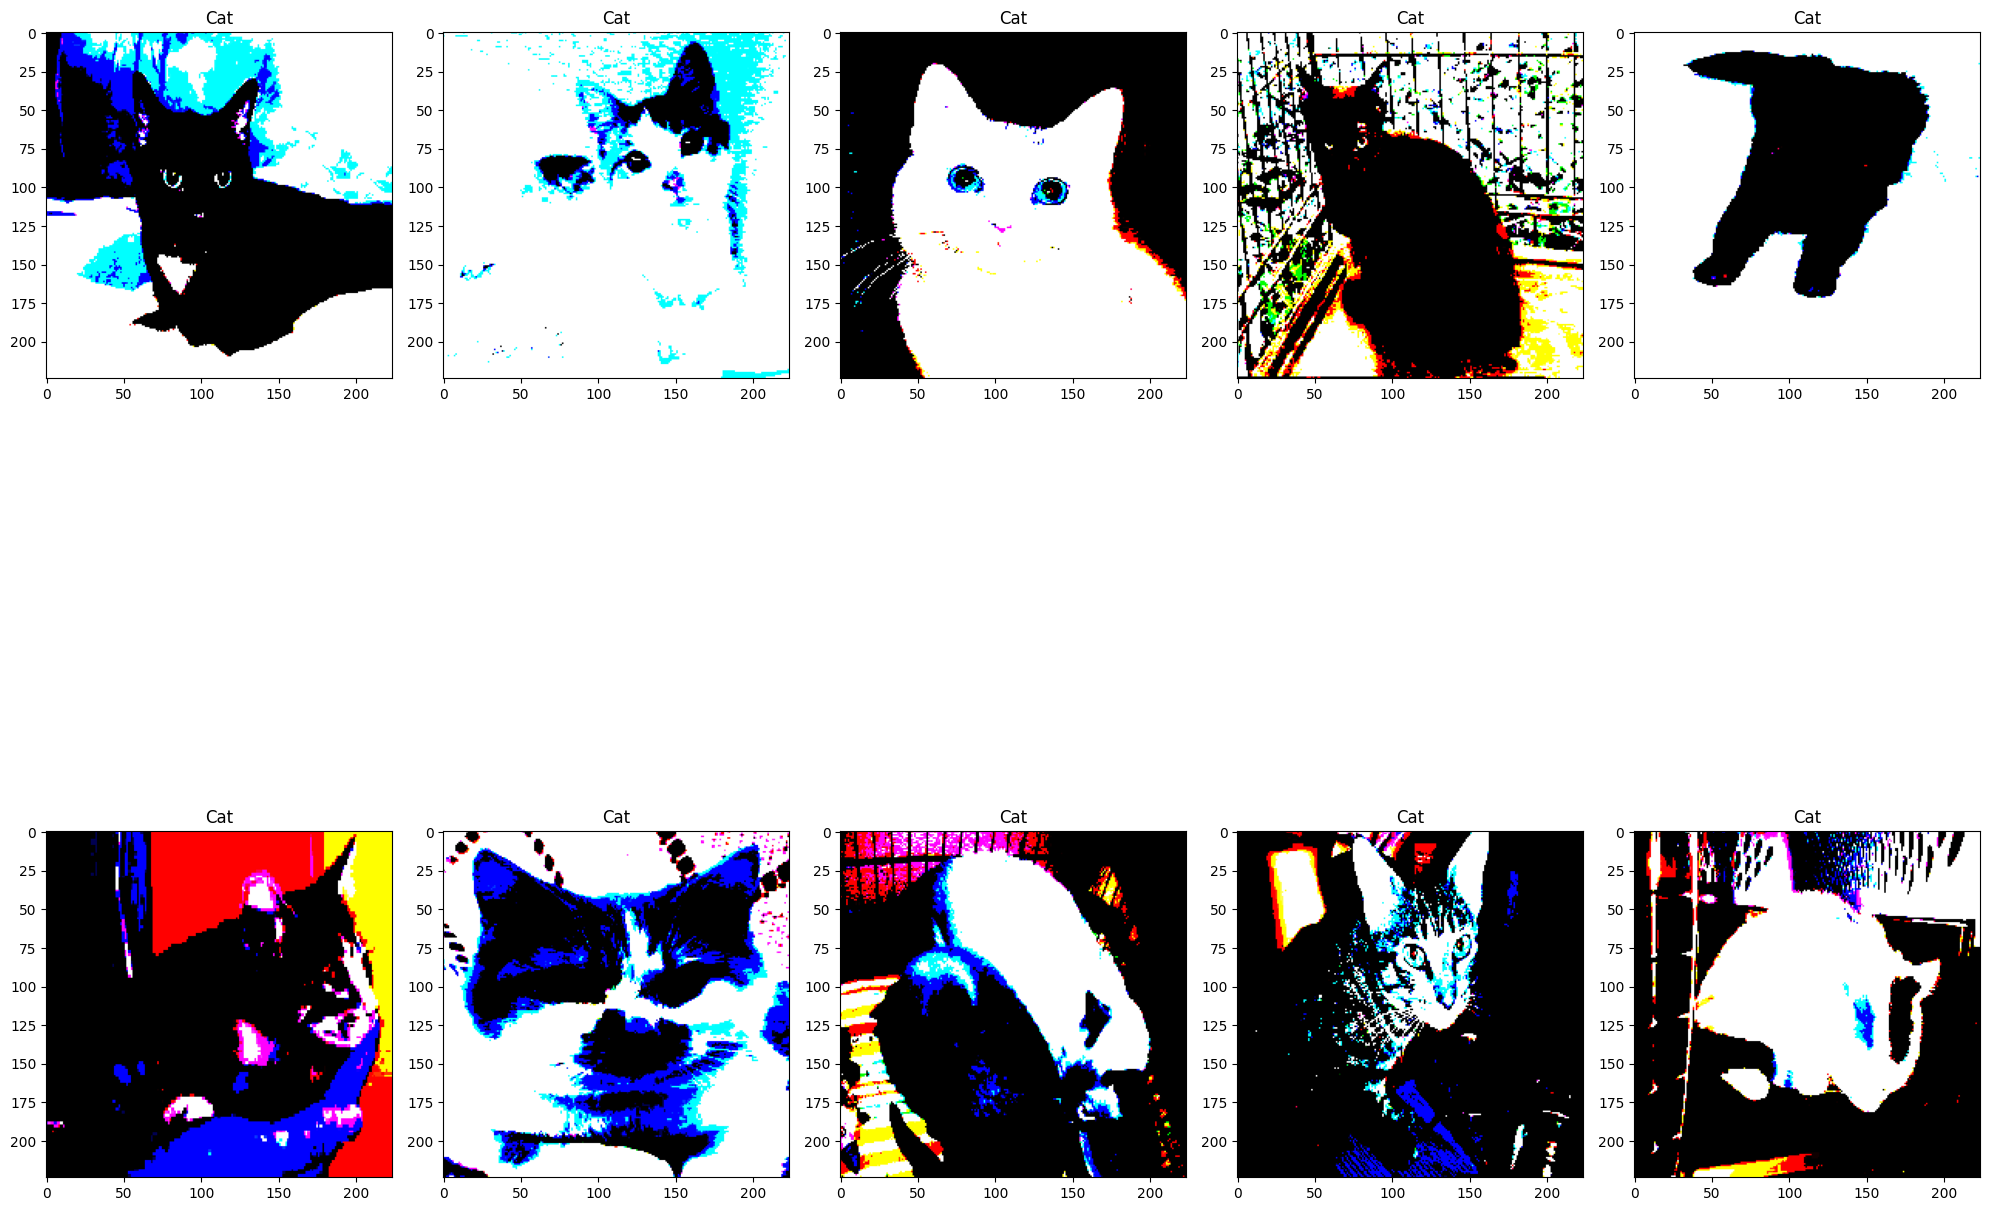

In [43]:

def plotPredictedImages(images,labels):
    fig,axes = plt.subplots(2,5,figsize=(20,20))
    
    axes = axes.flatten()
    
    for image,label,axe in zip(images,labels,axes):
        
        axe.imshow(image)
        axe.set_title("Cat" if label== 0 else "Dog")

    plt.tight_layout()
    plt.show()
    
    

plotPredictedImages(imgs,predict_labels_vgg16)

In [44]:
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

In [45]:
cm = confusion_matrix(test_batchs.classes,predict_labels_vgg16)

In [46]:
def plot_confusion_matrix(cm,classes,normalize=False,title="Confusion matrix",cmap=plt.cm.Blues):

    plt.imshow(cm,interpolation="nearest",cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)

    if normalize:
        cm = cm.astype("float") / cm.sum(axis=1)[:,np.newaxis]

    print(cm)

    thresh = cm.max() / 2.
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],horizontalalignment="center",color="white" if cm[i,j]>thresh else "black")

    plt.tight_layout()
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")

[[97  3]
 [ 3 97]]


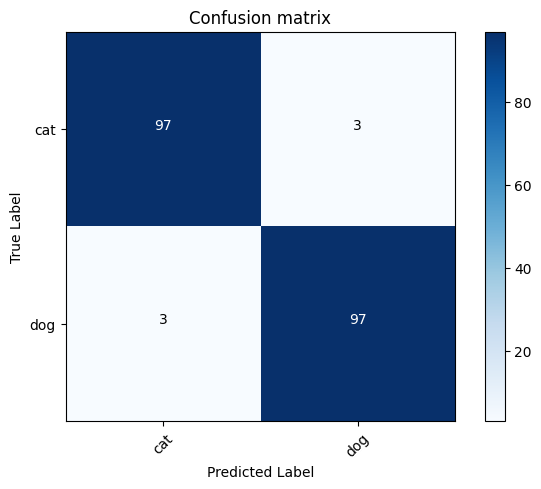

In [47]:
cm_plot_labels = ["cat","dog"]
plot_confusion_matrix(cm,cm_plot_labels)

In [48]:
import os 

if os.path.isdir("model/model.h5") is False:
    vgg16_model.save("model/model.h5")


INFO:tensorflow:Assets written to: ram://103cdefa-4cf0-4779-89e4-23b6001c83e4/assets


INFO:tensorflow:Assets written to: ram://103cdefa-4cf0-4779-89e4-23b6001c83e4/assets


In [50]:
del vgg16_model